In [95]:
import pandas as pd

t = pd.read_csv('data/test_set_metadata.csv')

In [96]:
t.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv'],
      dtype='object')

In [97]:
t['hostgal_photoz'].loc[t['hostgal_photoz']==0].count()

390510

In [98]:
t['hostgal_photoz'].value_counts()

0.0000    390510
0.4481       566
0.4787       562
0.4541       559
0.4659       558
0.4510       557
0.4589       554
0.4525       554
0.4757       553
0.4466       553
0.4741       552
0.4572       551
0.4738       551
0.4480       550
0.4524       550
0.4559       549
0.4508       548
0.4547       548
0.4583       547
0.4513       546
0.4748       545
0.4528       545
0.4472       544
0.4536       544
0.4633       543
0.4464       542
0.4526       542
0.4468       542
0.4505       541
0.4706       541
           ...  
2.0322         1
1.9076         1
1.9729         1
1.8735         1
2.0159         1
2.0423         1
2.9611         1
1.8041         1
1.7759         1
2.0439         1
2.0163         1
2.0417         1
1.8213         1
1.9334         1
1.9529         1
2.0124         1
1.8409         1
1.8765         1
0.0101         1
1.8076         1
1.9745         1
2.0214         1
1.9204         1
2.1744         1
1.9913         1
0.0126         1
2.1091         1
1.9379        

In [99]:
import seaborn as sns

/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


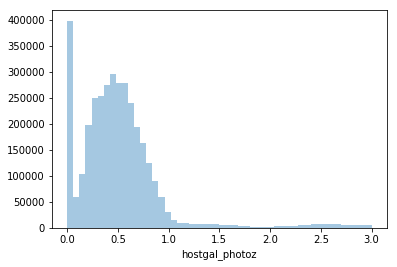

In [100]:
sns.distplot(t['hostgal_photoz'][t['hostgal_photoz']>-1].sort_values(ascending=True),kde=False, norm_hist=False)

In [71]:
cp = t['hostgal_photoz'].sort_values(ascending=True).cumsum()/t['hostgal_photoz'].sum()

In [101]:
import numpy as np

extragal_t = t['hostgal_photoz'].loc[t['hostgal_photoz']>0]
gal_t = t['hostgal_photoz'].loc[t['hostgal_photoz']==0]

# Number of q bins for extragalactic will be such as to have same cardinal. as galactic bin
q = np.ceil(extragal_t.count()/gal_t.count()).astype(int)

bins = pd.qcut(extragal_t, q=q)
res = bins.value_counts().sort_index().cumsum() / bins.value_counts().sort_index().sum()
res

(-0.00019999999999999998, 0.245]    0.125095
(0.245, 0.336]                      0.250007
(0.336, 0.423]                      0.375028
(0.423, 0.502]                      0.500090
(0.502, 0.585]                      0.625028
(0.585, 0.684]                      0.750057
(0.684, 0.834]                      0.875009
(0.834, 3.0]                        1.000000
Name: hostgal_photoz, dtype: float64

In [83]:
res.index[0]

Interval(-0.00019999999999999998, 0.245, closed='right')

In [87]:
q

8